### Clean needed data and save in seprate files

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import requests
import json

In [2]:
citation_df=pd.read_csv('papers.csv')

In [3]:
citation_df.columns
citation_df_mod=pd.DataFrame(columns=citation_df.columns)

In [5]:
# combine paper with same title into one row
i=0
while i<len(citation_df):
    title=citation_df.loc[i,'Title']
    ct=i
    conf=citation_df.loc[i,'Conference']
    year=citation_df.loc[i,'Year']
    authors=[]
    aff=[]
    while ct<len(citation_df) and citation_df.loc[ct,'Title']==title:
        authors.append(citation_df.loc[ct,'Author'])
        aff.append(citation_df.loc[ct,'Affiliation'])
        i=i+1
        ct=ct+1
    citation_df_mod.loc[len(citation_df_mod)]=[conf,year,title,authors,aff]
    
   




In [6]:
citation_df_mod.to_csv('papers_mod.csv',index=False)

In [7]:
citation_df_mod=pd.read_csv('papers_mod.csv')

In [8]:
citation_df_mod

,Conference,Year,Title,Author,Affiliation
0,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,"['Yingxue Wang', 'Rodney J Douglas', 'Shih-Chi...","['Swiss Federal Institute of Technology, Zuric..."
1,NeurIPS,2006,Multi-Task Feature Learning,"['Andreas Argyriou', 'Theos Evgeniou', 'Massim...","['Ecole Centrale de Paris', 'INSEAD', 'IIT & U..."
2,NeurIPS,2006,A Rate-Distortion Approach to Joint Pattern Al...,['Andrea Vedaldi'],['Facebook AI Research and University of Oxford']
3,NeurIPS,2006,Context Effects in Category Learning: An Inve...,"['Mike Mozer', 'Michael Jones', 'Michael Shett...","['Google Research and U. Colorado Boulder', 'I..."
4,NeurIPS,2006,Comparative Gene Prediction using Conditional ...,"['Jade P Vinson', 'David DeCaprio', 'Stacey Lu...","['Renaissance Technologies', 'None', 'None', '..."
...,...,...,...,...,...
13258,ICLR,2021,Stochastic Security: Adversarial Defense Using...,"['Mitch Hill', 'Jonathan Mitchell', 'Song-Chun...","['University of Central Florida', 'University ..."
13259,ICLR,2021,Factorizing Declarative and Procedural Knowled...,"['Anirudh Goyal', 'Alex Lamb', 'Phanideep Gamp...","['MILA, University of Montreal', 'University o..."
13260,ICLR,2021,Non-asymptotic Confidence Intervals of Off-pol...,"['Yihao Feng', 'Ziyang Tang', 'Na Zhang', 'Qia...","['The University of Texas at Austin', 'Univers..."
13261,ICLR,2021,Combining Label Propagation and Simple Models ...,"['Qian Huang', 'Horace He', 'Abhay Singh', 'Se...","['Cornell University', 'Facebook', 'Cornell Un..."


In [35]:
# getting paper id using title 
citation_df_mod['Paper_ID']=np.nan
citation_df_mod['Cited_Papers']=[[] for i in range(len(citation_df_mod))]

In [41]:
# number of papers before 2015
len(citation_df_mod[citation_df_mod['Year']<2010])

933

### For getting papers from 2006 to 2012

In [43]:
# error rate
error_rate=0
number_of_papers=len(citation_df_mod[citation_df_mod['Year']<2010])
for i in tqdm.trange(number_of_papers):
    title=citation_df_mod.loc[i,'Title']
    try:
        query="http://api.semanticscholar.org/graph/v1/paper/search?query="+title
        req=requests.get(query)
        response=req.json()
        id=response['data'][0]['paperId']
        citation_df_mod.loc[i,'Paper_ID']=id
        search_by_id="https://api.semanticscholar.org/graph/v1/paper/"+id+"?fields=title,citations.authors,authors"
        req=requests.get(search_by_id)
        cited_paper=[]
        
        response=dic2=json.loads(req.content.decode('utf-8'))
        
        for citation in response['citations']:
            cited_paper.append(citation['paperId'])
            citation_df_mod.loc[i,'Cited_Papers'].append(citation['paperId'])
       
        
       
    except Exception as e:
       
        error_rate=error_rate+1
    

error_rate

100%|██████████| 933/933 [1:58:54<00:00,  7.65s/it]  


116

In [29]:
citation_df_mod.head()


,Conference,Year,Title,Author,Affiliation,Paper_ID,Cited_Papers
0,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,"['Yingxue Wang', 'Rodney J Douglas', 'Shih-Chi...","['Swiss Federal Institute of Technology, Zuric...",NaN,[]
1,NeurIPS,2006,Multi-Task Feature Learning,"['Andreas Argyriou', 'Theos Evgeniou', 'Massim...","['Ecole Centrale de Paris', 'INSEAD', 'IIT & U...",1cac3ee85e52cb0afde71f66472e35a315a4a112,"['ad82862b99028bf87eda454bf0f92788f19cdbac', '..."
2,NeurIPS,2006,A Rate-Distortion Approach to Joint Pattern Al...,['Andrea Vedaldi'],['Facebook AI Research and University of Oxford'],NaN,[]
3,NeurIPS,2006,Context Effects in Category Learning: An Inve...,"['Mike Mozer', 'Michael Jones', 'Michael Shett...","['Google Research and U. Colorado Boulder', 'I...",7227f224679969446d5363c7dbfd61bcdd4b338f,"['c5c744b1609f473c882bcbd751eb13a72f13e7bc', '..."
4,NeurIPS,2006,Comparative Gene Prediction using Conditional ...,"['Jade P Vinson', 'David DeCaprio', 'Stacey Lu...","['Renaissance Technologies', 'None', 'None', '...",167126a5c592ea0ac743228c5465b45eed3f0e84,"['784355019ffeec8bd01557fce49891bcf697e57c', '..."


### for getting paper from 2006 to 2012

In [8]:
citation_df_mod_2006=pd.DataFrame(columns=citation_df.columns)
# index of of first paper in 2013
starting_paper= len(citation_df[citation_df['Year']<2006])
# index of last paper in 2017
ending_paper=len(citation_df[citation_df['Year']<2013])

for i in range(starting_paper,ending_paper):
    citation_df_mod_2006.loc[len(citation_df_mod_2006)]=citation_df.loc[i]

citation_df_mod_2006

,Conference,Year,Title,Author,Affiliation
0,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,Yingxue Wang,"Swiss Federal Institute of Technology, Zurich"
1,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,Rodney J Douglas,Institute of Neuroinformatics
2,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,Shih-Chii Liu,"Institute for Neuroinformatics, University of ..."
3,NeurIPS,2006,Multi-Task Feature Learning,Andreas Argyriou,Ecole Centrale de Paris
4,NeurIPS,2006,Multi-Task Feature Learning,Theos Evgeniou,INSEAD
...,...,...,...,...,...
5559,NeurIPS,2012,Multi-Stage Multi-Task Feature Learning,Jieping Ye,Arizona State University
5560,NeurIPS,2012,Multi-Stage Multi-Task Feature Learning,Changshui Zhang,Tsinghua University
5561,NeurIPS,2012,Robustness and risk-sensitivity in Markov deci...,Takayuki Osogami,IBM Research - Tokyo
5562,NeurIPS,2012,Nonparanormal Belief Propagation (NPBP),Gal Elidan,Hebrew University


### for getting paper from 2013 to 2017

In [9]:
citation_df_mod_2013=pd.DataFrame(columns=citation_df_mod.columns)
# index of of first paper in 2013
starting_paper= len(citation_df[citation_df['Year']<2013])
# index of last paper in 2017
ending_paper=len(citation_df[citation_df['Year']<2018])

for i in range(starting_paper,ending_paper):
    citation_df_mod_2013.loc[len(citation_df_mod_2013)]=citation_df.loc[i]

citation_df_mod_2013


,Conference,Year,Title,Author,Affiliation
0,NeurIPS,2013,Confidence Intervals and Hypothesis Testing fo...,Adel Javanmard,Stanford University
1,NeurIPS,2013,Confidence Intervals and Hypothesis Testing fo...,Andrea Montanari,Stanford
2,NeurIPS,2013,Bayesian optimization explains human active se...,Ali Borji,University of Southern California (USC)
3,NeurIPS,2013,Bayesian optimization explains human active se...,Laurent Itti,University of Southern California (USC)
4,NeurIPS,2013,Supervised Sparse Analysis and Synthesis Opera...,Pablo Sprechmann,Duke University
...,...,...,...,...,...
9739,NeurIPS,2017,Dynamic Revenue Sharing,IIIS Song Zuo,"IIIS, Tsinghua University"
9740,NeurIPS,2017,Multi-View Decision Processes: The Helper-AI P...,Christos Dimitrakakis,Chalmers / Harvard / Lille / Oslo
9741,NeurIPS,2017,Multi-View Decision Processes: The Helper-AI P...,David Parkes,Harvard University
9742,NeurIPS,2017,Multi-View Decision Processes: The Helper-AI P...,Goran Radanovic,Harvard


In [30]:
# citation_df_mod.to_csv('citations.csv',index=False)
citation_df_mod=pd.read_csv('citations_06_12.csv')
citation_df_mod

,Conference,Year,Title,Author,Affiliation,Paper_ID,Cited_Papers
0,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,"['Yingxue Wang', 'Rodney J Douglas', 'Shih-Chi...","['Swiss Federal Institute of Technology, Zuric...",NaN,[]
1,NeurIPS,2006,Multi-Task Feature Learning,"['Andreas Argyriou', 'Theos Evgeniou', 'Massim...","['Ecole Centrale de Paris', 'INSEAD', 'IIT & U...",1cac3ee85e52cb0afde71f66472e35a315a4a112,"['ad82862b99028bf87eda454bf0f92788f19cdbac', '..."
2,NeurIPS,2006,A Rate-Distortion Approach to Joint Pattern Al...,['Andrea Vedaldi'],['Facebook AI Research and University of Oxford'],NaN,[]
3,NeurIPS,2006,Context Effects in Category Learning: An Inve...,"['Mike Mozer', 'Michael Jones', 'Michael Shett...","['Google Research and U. Colorado Boulder', 'I...",7227f224679969446d5363c7dbfd61bcdd4b338f,"['c5c744b1609f473c882bcbd751eb13a72f13e7bc', '..."
4,NeurIPS,2006,Comparative Gene Prediction using Conditional ...,"['Jade P Vinson', 'David DeCaprio', 'Stacey Lu...","['Renaissance Technologies', 'None', 'None', '...",167126a5c592ea0ac743228c5465b45eed3f0e84,"['784355019ffeec8bd01557fce49891bcf697e57c', '..."
...,...,...,...,...,...,...,...
13258,ICLR,2021,Stochastic Security: Adversarial Defense Using...,"['Mitch Hill', 'Jonathan Mitchell', 'Song-Chun...","['University of Central Florida', 'University ...",NaN,[]
13259,ICLR,2021,Factorizing Declarative and Procedural Knowled...,"['Anirudh Goyal', 'Alex Lamb', 'Phanideep Gamp...","['MILA, University of Montreal', 'University o...",NaN,[]
13260,ICLR,2021,Non-asymptotic Confidence Intervals of Off-pol...,"['Yihao Feng', 'Ziyang Tang', 'Na Zhang', 'Qia...","['The University of Texas at Austin', 'Univers...",NaN,[]
13261,ICLR,2021,Combining Label Propagation and Simple Models ...,"['Qian Huang', 'Horace He', 'Abhay Singh', 'Se...","['Cornell University', 'Facebook', 'Cornell Un...",NaN,[]


In [31]:
# convert cited papers to list
# citation_df_mod['Cited_Papers']=citation_df_mod['Cited_Papers'].apply(lambda x: x[1:-1].split(', '))
# remove extra string in each id of cited papers
citation_df_mod['Cited_Papers']=citation_df_mod['Cited_Papers'].apply(lambda x: [i[1:-1] for i in x[1:-1].split(', ')])

In [32]:
# creating citation graph
class node():
    id : str
    cited_by : list
    def __init__(self,id):
        self.id=id
        self.cited_by=[]
    def add_citation(self,citation):
        self.cited_by.append(citation)
    
    def get_cited_by(self):
        return self.cited_by

class Graph:
    nodes: dict
    def __init__(self):
        self.nodes={}
    
    def add_node(self,node):
        self.nodes[node.id]=node
    
    def get_node(self,id):
        return self.nodes.get(id)
graph=Graph()
for i in range(933):
    if(type(citation_df_mod.loc[i,'Paper_ID'])!=str):
        continue
    graph.add_node(node(citation_df_mod.loc[i,'Paper_ID']))

for i in range(len(citation_df_mod)):
    for cited_paper in citation_df_mod.loc[i,'Cited_Papers']:
        if(graph.get_node(cited_paper)!=None):
            graph.get_node(cited_paper).add_citation(citation_df_mod.loc[i,'Paper_ID'])





In [33]:
citation_df_mod


,Conference,Year,Title,Author,Affiliation,Paper_ID,Cited_Papers
0,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,"['Yingxue Wang', 'Rodney J Douglas', 'Shih-Chi...","['Swiss Federal Institute of Technology, Zuric...",NaN,[]
1,NeurIPS,2006,Multi-Task Feature Learning,"['Andreas Argyriou', 'Theos Evgeniou', 'Massim...","['Ecole Centrale de Paris', 'INSEAD', 'IIT & U...",1cac3ee85e52cb0afde71f66472e35a315a4a112,"[ad82862b99028bf87eda454bf0f92788f19cdbac, 489..."
2,NeurIPS,2006,A Rate-Distortion Approach to Joint Pattern Al...,['Andrea Vedaldi'],['Facebook AI Research and University of Oxford'],NaN,[]
3,NeurIPS,2006,Context Effects in Category Learning: An Inve...,"['Mike Mozer', 'Michael Jones', 'Michael Shett...","['Google Research and U. Colorado Boulder', 'I...",7227f224679969446d5363c7dbfd61bcdd4b338f,"[c5c744b1609f473c882bcbd751eb13a72f13e7bc, f5a..."
4,NeurIPS,2006,Comparative Gene Prediction using Conditional ...,"['Jade P Vinson', 'David DeCaprio', 'Stacey Lu...","['Renaissance Technologies', 'None', 'None', '...",167126a5c592ea0ac743228c5465b45eed3f0e84,"[784355019ffeec8bd01557fce49891bcf697e57c, 7a1..."
...,...,...,...,...,...,...,...
13258,ICLR,2021,Stochastic Security: Adversarial Defense Using...,"['Mitch Hill', 'Jonathan Mitchell', 'Song-Chun...","['University of Central Florida', 'University ...",NaN,[]
13259,ICLR,2021,Factorizing Declarative and Procedural Knowled...,"['Anirudh Goyal', 'Alex Lamb', 'Phanideep Gamp...","['MILA, University of Montreal', 'University o...",NaN,[]
13260,ICLR,2021,Non-asymptotic Confidence Intervals of Off-pol...,"['Yihao Feng', 'Ziyang Tang', 'Na Zhang', 'Qia...","['The University of Texas at Austin', 'Univers...",NaN,[]
13261,ICLR,2021,Combining Label Propagation and Simple Models ...,"['Qian Huang', 'Horace He', 'Abhay Singh', 'Se...","['Cornell University', 'Facebook', 'Cornell Un...",NaN,[]


In [34]:
# most cited paper
max_citation=0
max_citation_paper=None
for node in graph.nodes.values():
    if len(node.get_cited_by())>max_citation:
        max_citation=len(node.get_cited_by())
        max_citation_paper=node.id
print(max_citation_paper,max_citation)
print(citation_df_mod[citation_df_mod['Paper_ID']==max_citation_paper]['Title'].values[0])

1a0a3eac29839894ea07cc3b1c2a3b2a0c63c3f7 5
Dual Averaging Method for Regularized Stochastic Learning and Online Optimization


In [35]:
# average citation
total_citation=0
for node in graph.nodes.values():
    total_citation=total_citation+len(node.get_cited_by())
print(total_citation/len(graph.nodes))
print(len(graph.nodes))


0.3780193236714976
828


In [36]:
# top 10 most cited paper
citation_count={}
for node in graph.nodes.values():
    citation_count[node.id]=len(node.get_cited_by())
sorted_citation_count=sorted(citation_count.items(), key=lambda x: x[1], reverse=True)
sorted_citation_count[:10]


[('1a0a3eac29839894ea07cc3b1c2a3b2a0c63c3f7', 5),
 ('2f14e3b459dc78868851c372ae00a74519c3e1f4', 4),
 ('8e20c700d413278e06affa930e21e1aa04f27aca', 4),
 ('5c5060e4e0aa92357f78c03d43da577e7173677a', 4),
 ('2f5521885acca3905a83c953e7a2f78ec39e218e', 4),
 ('42ea66546091e5b0c47f74e6063ff7d940990681', 4),
 ('aa1fa18231b8c6b35a21796af446899fc681a107', 4),
 ('803370480d83e884ae54b4793c2d518c9fed05a2', 4),
 ('c19e0059b05ca134c8dbe29e73961bce860e6a88', 3),
 ('457628a1c232bb48acc2db8440571e289cc80e15', 3)]

In [37]:
# distribution of citation
citation_distribution={}
for node in graph.nodes.values():
    citation_distribution[len(node.get_cited_by())]=citation_distribution.get(len(node.get_cited_by()),0)+1
sorted_citation_distribution=sorted(citation_distribution.items(), key=lambda x: x[0], reverse=False)
sorted_citation_distribution


[(0, 597), (1, 177), (2, 35), (3, 11), (4, 7), (5, 1)]

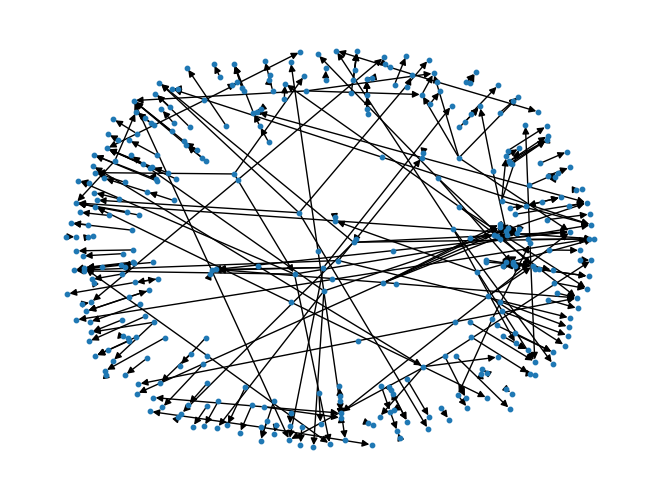

In [92]:
# create visual graph
import networkx as nx
G=nx.DiGraph()



for node in graph.nodes.values():
    
    # size of node is proportional to number of citation
    # G.add_node(node.id,size=len(node.get_cited_by()))
    # give a random color to node
    # G.add_node(node.id,weight=len(node.get_cited_by()))
    
    for cited_paper in node.get_cited_by():
        G.add_node(node.id)
        G.add_node(cited_paper)
        G.add_edge(node.id,cited_paper)
nx.draw(G,with_labels=False,node_size=10)
# save graph as image
plt.savefig("citation_graph.png", dpi=1000)

plt.show()



Text(0.5, 0, 'Number of citation')

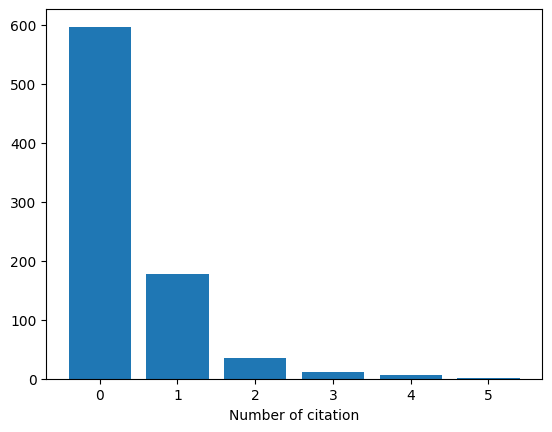

In [83]:
# distribution graph of citation
plt.bar([i[0] for i in sorted_citation_distribution],[i[1] for i in sorted_citation_distribution])
plt.xlabel('Number of citation')

In [1]:
# max depth of citation graph
for node in graph.nodes.keys():
    id=node.id
    depth=0
    while(node.cited_by!=[]):
        depth=depth+1
        node=node.get_cited_by()[0]
    print(id,depth)

NameError: name 'graph' is not defined

In [40]:
# map cited paper id to index
id_to_index={}
index_to_id={}
for i in range(len(citation_df_mod)):
    if(type(citation_df_mod.loc[i,'Paper_ID'])==str):
        id_to_index[citation_df_mod.loc[i,'Paper_ID']]=i
        index_to_id[i]=citation_df_mod.loc[i,'Paper_ID']
id_to_index

{'1cac3ee85e52cb0afde71f66472e35a315a4a112': 1,
 '7227f224679969446d5363c7dbfd61bcdd4b338f': 3,
 '167126a5c592ea0ac743228c5465b45eed3f0e84': 4,
 '219a1eed0d61a144024a6d1cf487c116d1cfd017': 5,
 'dc08a44d88826a80472c374a287a78376a167fd0': 6,
 '2ca59d9e88682a56b6f8fc748d3186d089749bf2': 7,
 '67f37538c732eb1d9f4d5f47816b5e210085ae8f': 8,
 '600f5d8df92b6cc7f4b800fabe47f66eb7fb9acd': 9,
 '401f2075dd1963c522fb36f5a84a4ad12d73637e': 10,
 'b672b3ee71b78050bdde8b4a4cecbb653a822b5d': 11,
 'e75591901afd4a1868ff2e0a1e161592102ccff1': 12,
 '573ba91771eda7177015e5597126f881bf88f9a3': 13,
 'ba3ad95a489a0c7345456716e297d63c36181d5a': 14,
 'c434bd9db63fca8c1fa3ff28c2d3962441b77f89': 15,
 '82e770c6165c73cb78582c5700c80cc9cbbdef60': 16,
 'd4dfd0b0effd083ddd55e4bd9fc581528bd2ba8d': 17,
 '6d66bf5e174f1edf74b46b34cebfb1dcf2439b57': 18,
 '42e74bc62e952d9c67e4f940796a5853fd3c45df': 19,
 '14f4de8ca95add565ef8fe39d1ca7a131e17bd23': 20,
 '2ff13808feb88f95ecd0b7070d606e21791bd9d7': 21,
 '21bdc908911aa22afed0feea17

In [47]:
# create igraph
import igraph as ig
g=ig.Graph(directed=True)
g.add_vertices(len(citation_df_mod))
for cited_paper in graph.nodes.values():
    for citing_paper in cited_paper.get_cited_by():
        g.add_edges([(id_to_index[cited_paper.id],id_to_index[citing_paper])])
g.summary()

# plot igraph
ig.plot(g,vertex_size=5,vertex_label=range(len(citation_df_mod)),vertex_label_size=5,vertex_label_dist=1,vertex_label_angle=0,edge_arrow_size=0.1,edge_arrow_width=0.1,edge_width=0.1,edge_curved=0.1,edge_color='black',vertex_color='black',layout=g.layout('kk'))



## Citations Analysis

In [ ]:
df=pd.read_csv('papers.csv')
# dataframe for doing citations related analysis
df_citations=pd.DataFrame(columns=df.columns)

#### Merging the papers with same title

In the given dataset if a paper has multiple authors than it is repeated for each author. So, we are merging the papers with same title and creating a new dataset.

In [ ]:
i=0
while i<len(df):
    title=df.loc[i,'Title']
    ct=i
    conf=df.loc[i,'Conference']
    year=df.loc[i,'Year']
    authors=[]
    aff=[]
    while ct<len(df) and df.loc[ct,'Title']==title:
        authors.append(df.loc[ct,'Author'])
        aff.append(df.loc[ct,'Affiliation'])
        i=i+1
        ct=ct+1
    df_citations.loc[len(df_citations)]=[conf,year,title,authors,aff]

### Getting citations for each paper from title using Semantic Scholar API

Using Semantic Scholar API we are getting the citations for each paper from title. However due to limit on number of requests we can make to the API and time it consumes to get Id from the title and citations from id we are only getting citations for paper belonging to year 2006-2012.


In [ ]:
error_rate=0
citation_graph=pd.DataFrame(columns=['PaperId','Cited_PaperId'])
for i in tqdm.trange(len(df_citations[df_citations['Year']<=2012])):
    title=df_citations.loc[i,'Title']
    try:
        # getting id by title
        query="http://api.semanticscholar.org/graph/v1/paper/search?query="+title
        req=requests.get(query)
        response=req.json()
        id=response['data'][0]['paperId']
        citation_graph.loc[i]=[id,[]]

        # getting citations by id
        search_by_id="https://api.semanticscholar.org/graph/v1/paper/"+id+"?fields=title,citations.authors,authors"
        req=requests.get(search_by_id)
        response=dic2=json.loads(req.content.decode('utf-8'))

        for citation in response['citations']:
            citation_graph.loc[i,'Cited_PaperId'].append(citation['paperId'])

    except:
        error_rate=error_rate+1
    if(i%100==0):
        print(error_rate/(i+1))
        citation_graph.to_csv('citation_graph_2012.csv',index=False)

print(error_rate/len(df_citations[df_citations['Year']<=2012]))
# citation_graph.to_csv('citation_graph_2012.csv',index=False)

We were able to get citations for around 1400 papers from around 1800 papers belonging to year 2006-2012. The reason for not getting citations for all the papers is that some of the papers are not present in the Semantic Scholar database.

In [ ]:
# citation_graph.to_csv('citation_graph_2012.csv',index=False)
# this file with used later to after mapping countries to papers

###  Getting country of each paper
'paper_with_country.csv' already contains the country of each paper. We will map the title of paper to a country. However in cases when when a paper has multiple authors belonging to different countries we will assign majority country to the paper.



In [ ]:
country = pd.read_csv('citation_data/papers_with_country.csv')
country_till_2012=country[country['Year']<=2012]
country_till_2012['PaperId']=np.nan

In [ ]:
title_to_id={}
unique_titles=country_till_2012['Title'].unique()

In [ ]:
error_rate=0
for i in tqdm.trange(len(unique_titles)):
    title=unique_titles[i]
    url="http://api.semanticscholar.org/graph/v1/paper/search?query="+title
    try:
        req=requests.get(url)
        response=req.json()
        id=response['data'][0]['paperId']
        title_to_id[title]=id
    except:
        error_rate+=1
    if(i%100==0):
        print(i)
        print(error_rate/(i+1))
        print("-------------------")
print(error_rate/len(unique_titles))

In [ ]:
# with open('title_to_id.json', 'w') as fp:
#     json.dump(title_to_id, fp)
# load json file
with open('citation_data/title_to_id.json', 'r') as fp:
    title_to_id = json.load(fp)

In [ ]:
for i in tqdm.trange(len(country_till_2012)):
    if title in title_to_id:
        country_till_2012['PaperId'][i]=title_to_id[title]
    else:
        country_till_2012['PaperId'][i]=np.nan

In [ ]:
# country_till_2012.to_csv('papers_with_country_id.csv',index=False)

In [ ]:
country_till_2012=pd.read_csv('citation_data/papers_with_country_id.csv')
citation_graph=pd.read_csv('citation_data/citation_graph_2012.csv')

In [ ]:
for i in tqdm.trange(len(citation_graph)):
    citation_graph['Cited_PaperId'][i]=eval(citation_graph['Cited_PaperId'][i])
citation_graph.head()

In [ ]:
id_to_title={}
for title,id in tqdm.tqdm(title_to_id.items()):
    id_to_title[id]=title

In [ ]:
citation_graph['Title']=np.nan

In [ ]:
for i in range(len(citation_graph)):
    id=citation_graph['PaperId'][i]
    try:
        title=id_to_title[id]
        citation_graph['Title'][i]=title
    except:
        citation_graph['Title'][i]=np.nan

In [ ]:
title_to_country={}
papers_with_country=pd.read_csv('citation_data/papers_with_country_id.csv')
for title in unique_titles:
    country=papers_with_country[papers_with_country['Title']==title]['country'].values
    # majority vote on title to country
    country_count={}
    for c in country:
        # print(type(c))
        if(c!='None'):
            if c in country_count:
                country_count[c]+=1
            else:
                country_count[c]=1
    country_count=sorted(country_count.items(),key=lambda x:x[1],reverse=True)
    if(len(country_count)==0):
        title_to_country[title]='None'
    else:
        title_to_country[title]=country_count[0][0]

In [ ]:
citation_graph['Country']=np.nan
for i in tqdm.trange(len(citation_graph)):
    title=citation_graph['Title'][i]
    try:
        country=title_to_country[title]
        citation_graph['Country'][i]=country
    except:
        citation_graph['Country'][i]=np.nan

### Creating a Visual Citation Graph once with find country of each paper

Number of citations for each paper is calculated as follows:
- Get Paper Id from title using Semantic Scholar API
- If Paper Id is present in the 'Cited_PaperId' of other papers than increment the citation count of that paper by 1
- If Paper Id is not present in the 'Cited_PaperId' of other papers than increment the citation count of that paper by 0



In [ ]:
citation_graph=pd.read_csv('citation_data/citation_graph_2012_with_country.csv')
citation_graph.head()# citation_graph.to_csv('citation_graph_2012_with_country.csv',index=False)

In [ ]:
# reset index
citation_graph=citation_graph.reset_index(drop=True)

Conveting str into list (by default list is converted into str while saving in csv)

In [ ]:
for i in tqdm.trange(len(citation_graph)):
    citation_graph.loc[i,"Cited_PaperId"]=eval(citation_graph.loc[i,'Cited_PaperId'])
citation_graph.head()

In [ ]:
id_to_index={}
index_to_id={}
for i in tqdm.trange(len(citation_graph)):
    # print(citation_graph['PaperId'][i])
    id_to_index[citation_graph.loc[i,'PaperId']]=i
    index_to_id[i]=citation_graph.loc[i,'PaperId']

In [ ]:
graph={}
for i in range(len(citation_graph)):
    graph[i]={'country':'None','Cited_PaperId':[]}
    graph[i]['country']=citation_graph.loc[i,'Country']
    for j in citation_graph.loc[i,'Cited_PaperId']:
        if j in id_to_index:
            graph[i]['Cited_PaperId'].append(id_to_index[j])

# save the graph as json
with open('citation_graph_2012.json', 'w') as fp:
    json.dump(graph, fp)

### Some stats about number of times a paper is cited

While for most paper the number of times it is cited is 0, one reason could be that we are only considering papers belonging to year 2006-2012. So if a paper is getting cited after 2012 it will not be considered. Also we only considering citations amoung the dataset papers. So if a paper is cited by a paper not present in the dataset it will not be considered.


In [ ]:
# count of papers which are cited by other papers
citation_count={}
for i in tqdm.trange(len(citation_graph)):
    citation_count[i]=0
    for j in citation_graph.loc[i,'Cited_PaperId']:
        if j in id_to_index:
            citation_count[i]=citation_count[i]+1



# sort the citation count
sorted_citation_count=sorted(citation_count.items(), key=lambda x: x[1],reverse=True)

# plot the citation count
plt.figure(figsize=(15,5))
# frequency of citation count
plt.hist(citation_count.values(),bins=100)
plt.xlabel('Citation count')
plt.title('Citation count of papers')

Top 10 countries with most number of papers will be assigned a unique color and rest will be assigned a common color

In [ ]:
top_10_countries=citation_graph['Country'].value_counts()[:10].index
top_10_countries

Top 10 countries with most papers make up around 87% of the total papers

In [ ]:
print(100*np.sum(citation_graph['Country'].value_counts()[:10])/len(citation_graph))

Size of node is proportional to number of times a paper is cited .Color of node is based on country of paper

In [ ]:
from pyvis.network import Network
net=Network(notebook=True)
for node in graph:
    group=graph[node]['country']
    if group in top_10_countries:
        # change str to index in top 10 countries
        group=top_10_countries.get_loc(group)
    else:
        group=10
    net.add_node(node,size=citation_count[node],group=group)


# add edges
for node in graph:

    for edge in graph[node]['Cited_PaperId']:
        net.add_edge(node,edge)

net.show_buttons(filter_=['physics'])
net.save_graph('citation_data/citation_graph_2012_2.html')

### Authors with most papers

In [ ]:
author_count={}

for i in tqdm.tqdm(range(len(df))):
    author=df.loc[i,'Author']
    author_count[author]=author_count.get(author,0)+1
# top 100 authors
sorted_author_count=sorted(author_count.items(),key=lambda x:x[1],reverse=True)
sorted_author_count
# save as json
with open('citation_data/author_count.json','w') as f:
    json.dump(sorted_author_count,f)

In [ ]:
top_100_authors=sorted_author_count[:100]

### Top 10 Authors with most papers

In [ ]:
top_10_authors=top_100_authors[:10]
top_10_authors

### Collaborations network for top 100 authors
- Edge: If two authors have collaborated on a paper
- Weight of edge : Number of times they have collaborated
- Size of node : Number of papers written by author

Getting the number of papers on which two authors have collaborated on all combinations of top 100 authors.

In [ ]:

collobration=pd.DataFrame(columns=['Author1','Author2','Weight'])

for author1 in top_100_authors:
    for author2 in top_100_authors:
        if(author1!=author2):
            # find number of papers they worked on together using title

            title1=df[df['Author']==author1[0]]['Title']
            title2=df[df['Author']==author2[0]]['Title']

            common_papers=len(set(title1).intersection(set(title2)))
            if(common_papers>0):
                collobration.loc[len(collobration)]=[author1[0],author2[0],common_papers]
collobration=collobration.sort_values(by='Weight',ascending=False)
collobration.head()
# collobration.to_csv('citation_data/collobration.csv',index=False)
collobration=pd.read_csv('citation_data/collobration.csv')

In [ ]:
# remove 1 from weight
collobration['Weight']=collobration['Weight']-1
# covnert int64 to int32
collobration['Weight']=collobration['Weight'].astype('int32')

### Creating Colloborative Network

In [ ]:
from pyvis.network import Network
net = Network(notebook=True)


for author in top_100_authors:
    net.add_node(author[0], size=author[1])

for i in range(len(collobration)):
    net.add_edge(collobration.loc[i,'Author1'], collobration.loc[i,'Author2'],value=int(collobration.loc[i,'Weight']))

net.save_graph("citation_data/collobration2.html")